In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('E:\MLProjects\health_stock\Datasets\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
df.shape

(5110, 12)

In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [22]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [23]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.83,21161.72,67.00,17741.25,36932.00,54682.00,72940.00
age,5110.0,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5110.0,106.15,45.28,55.12,77.24,91.88,114.09,271.74
bmi,5110.0,28.89,7.70,10.30,23.80,28.40,32.80,97.60
stroke,5110.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00


In [10]:
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [26]:
df['Residence_type'].nunique()

2

In [27]:
for col in df.columns:
   if df[col].dtypes=='object':
      print(f'No of Unique values in {col}: {df[col].nunique()}')
      print()
      print(f'Col catagories:{df[col].value_counts()}')
      print('-'*40)

No of Unique values in gender: 3

Col catagories:gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
----------------------------------------
No of Unique values in ever_married: 2

Col catagories:ever_married
Yes    3353
No     1757
Name: count, dtype: int64
----------------------------------------
No of Unique values in work_type: 5

Col catagories:work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
----------------------------------------
No of Unique values in Residence_type: 2

Col catagories:Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
----------------------------------------
No of Unique values in smoking_status: 4

Col catagories:smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
----------------------------------------


## Visualization

In [94]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [15]:
num_cols=df.select_dtypes(exclude='object').columns

# Univariante Analysis

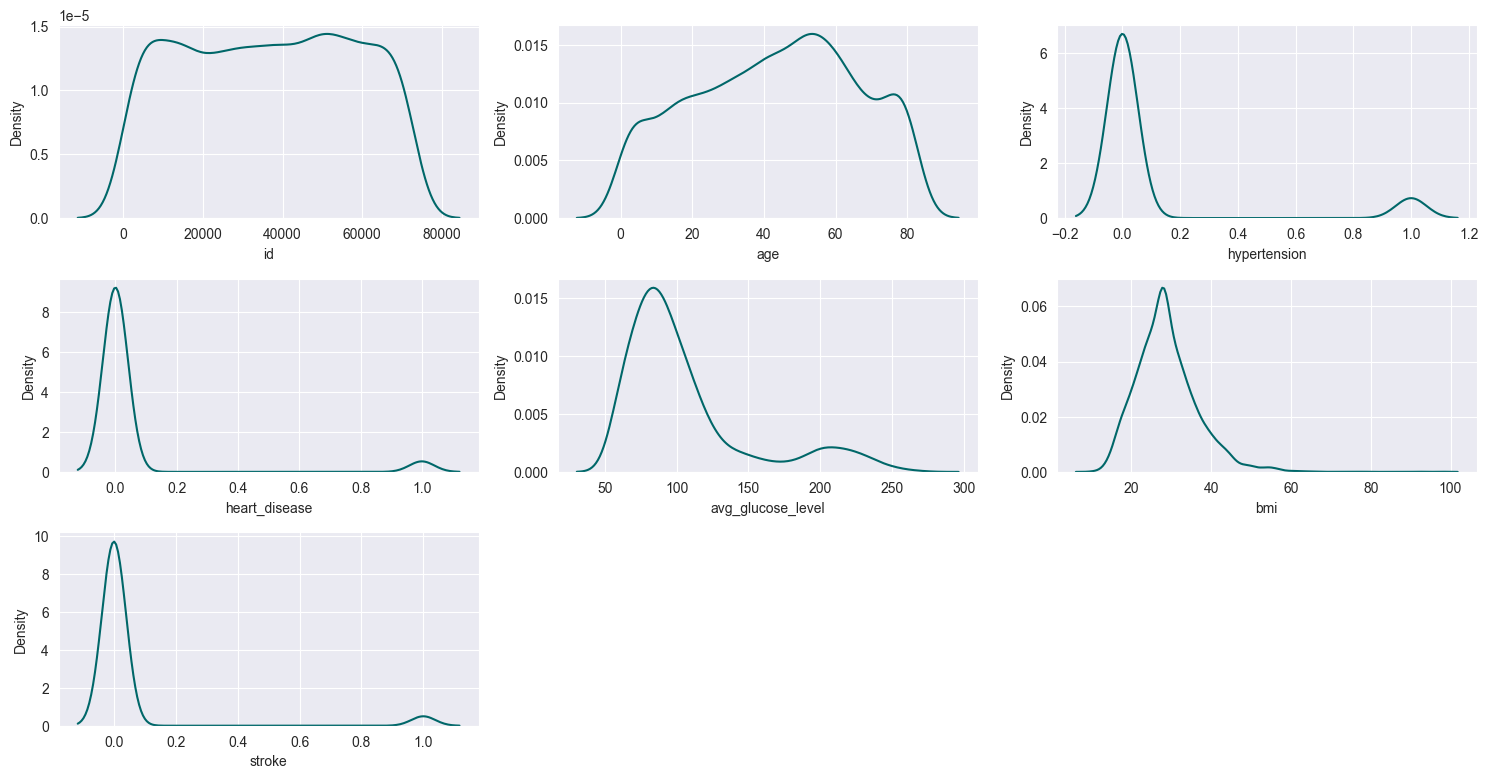

In [16]:
# Set the style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))

# Loop through the numeric columns and plot each one
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, 1 + i)
    sns.kdeplot(df[col],  color='#006769')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

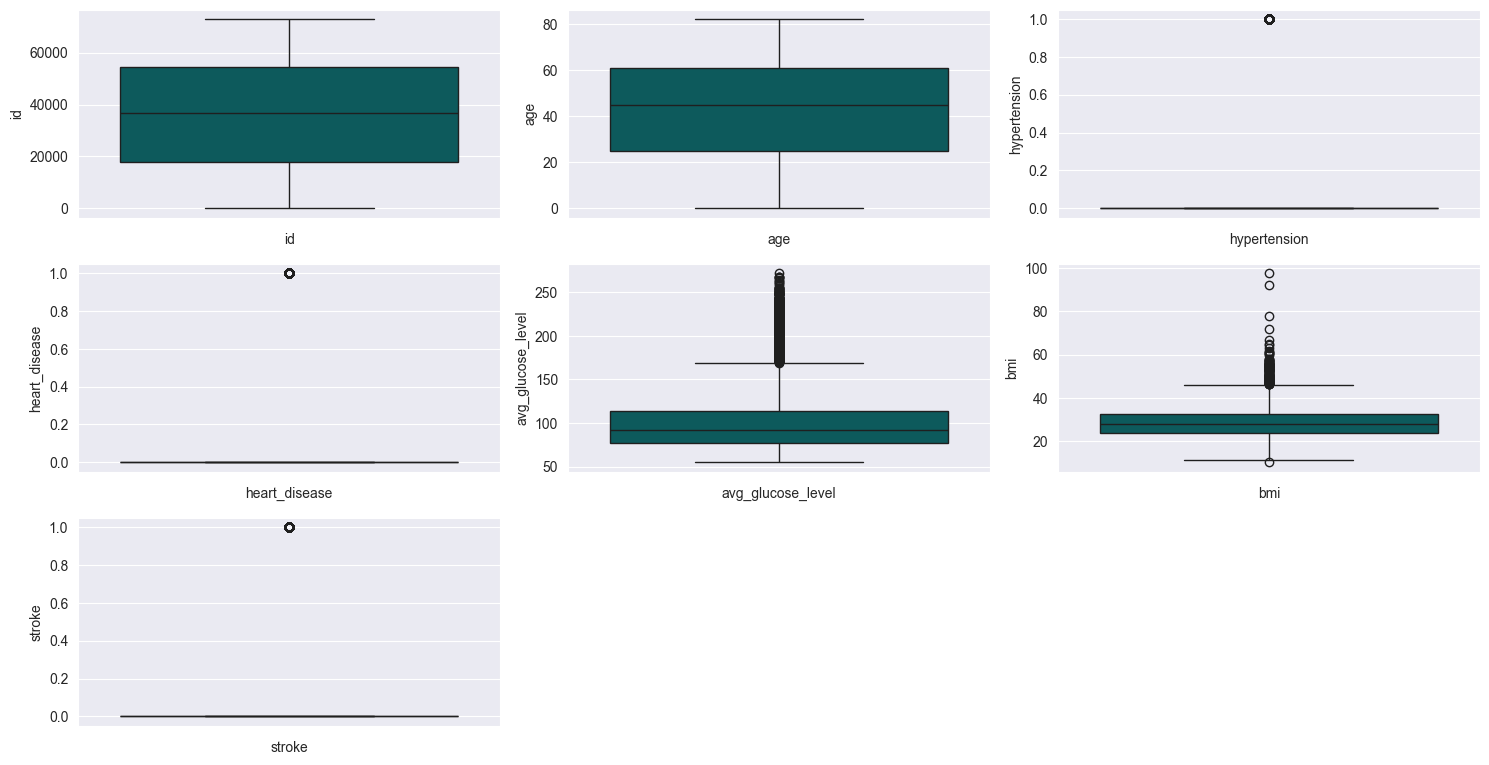

In [17]:
# Set the style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))

# Loop through the numeric columns and plot each one
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, 1 + i)
    sns.boxplot(df[col],  color='#006769')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
cate_cols=df.select_dtypes(include='object').columns

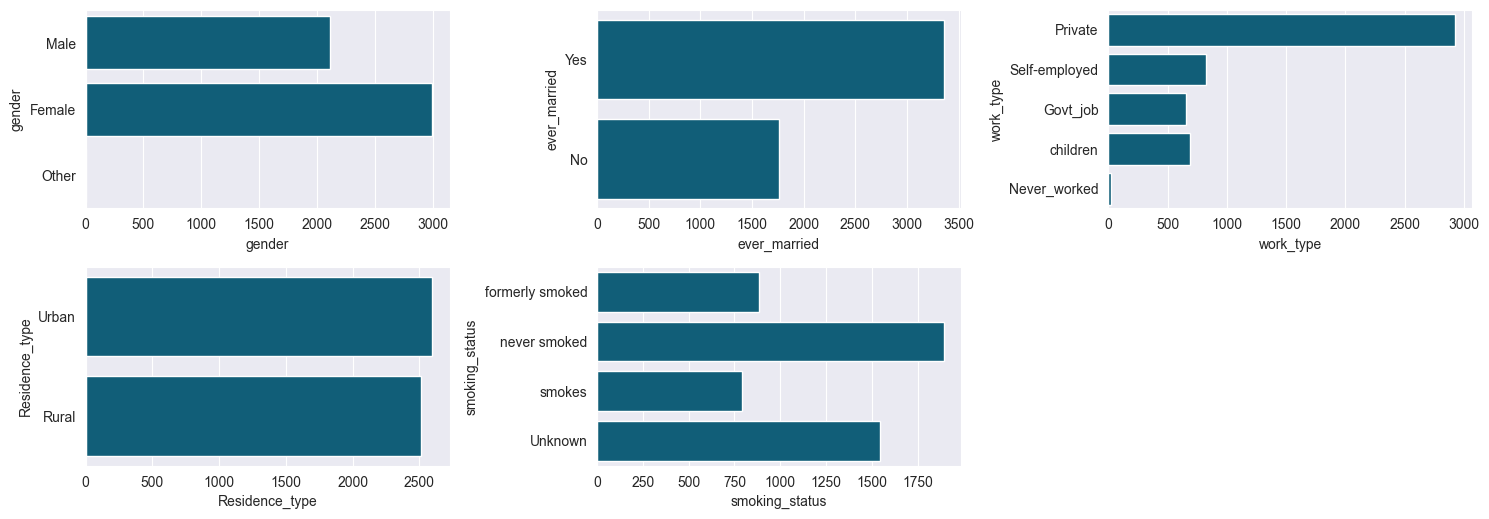

In [19]:
# Set the style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))

# Loop through the numeric columns and plot each one
for i, col in enumerate(cate_cols):
    plt.subplot(4, 3, 1 + i)
    sns.countplot(df[col],  color='#006789')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

# Bivarient Analysis

<Axes: ylabel='stroke'>

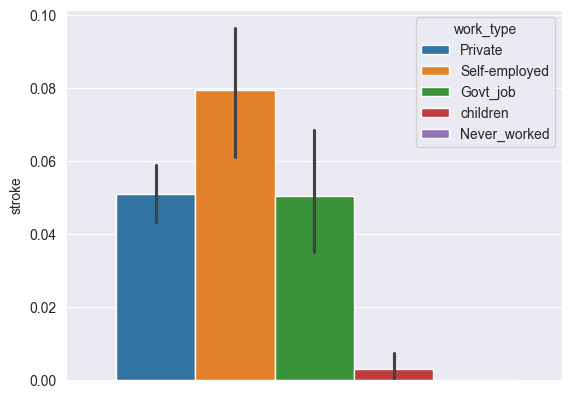

In [20]:
sns.barplot(hue=df['work_type'],y=df['stroke'])

In [38]:
labels=df['work_type'].unique()

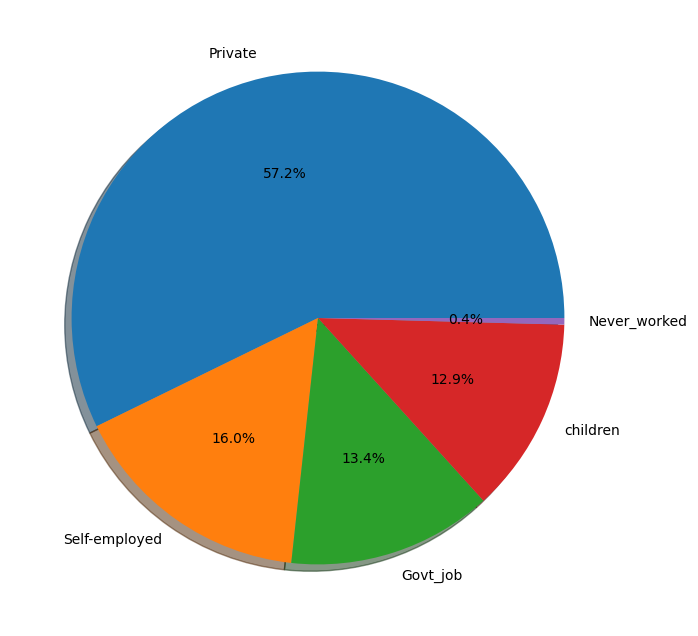

In [42]:
plt.figure(figsize=(15,8))
plt.pie(df['work_type'].value_counts(normalize=True),labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

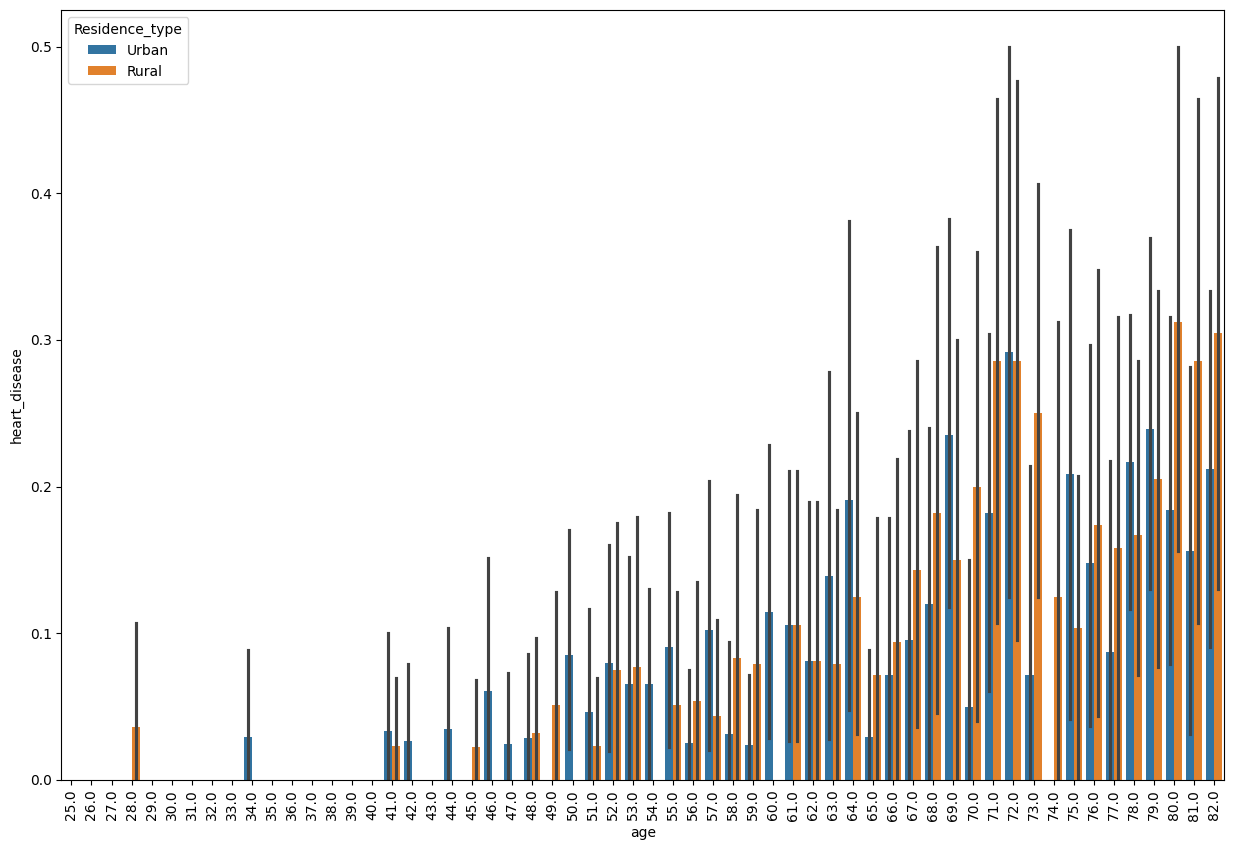

In [44]:
age=df[df['age']>=25]
plt.figure(figsize=(15, 10))
sns.barplot(x=age.age,y=df['heart_disease'],hue=df['Residence_type'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

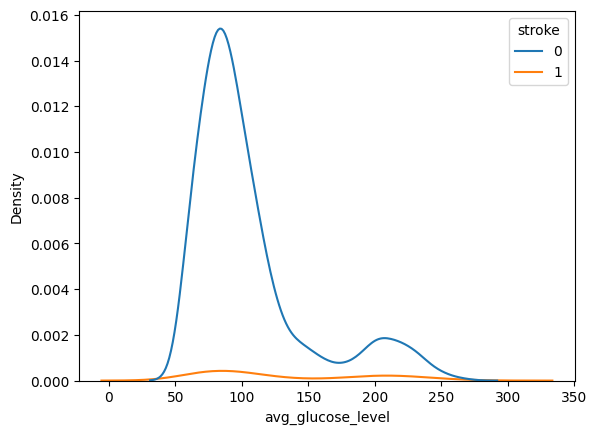

In [45]:
sns.kdeplot(hue=df['stroke'],x=df['avg_glucose_level'])

<Axes: xlabel='gender', ylabel='count'>

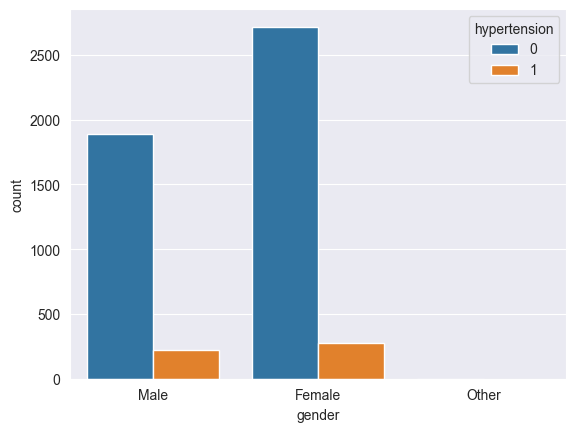

In [25]:
sns.countplot(x=df['gender'],hue=df['hypertension'])

<Axes: xlabel='gender', ylabel='count'>

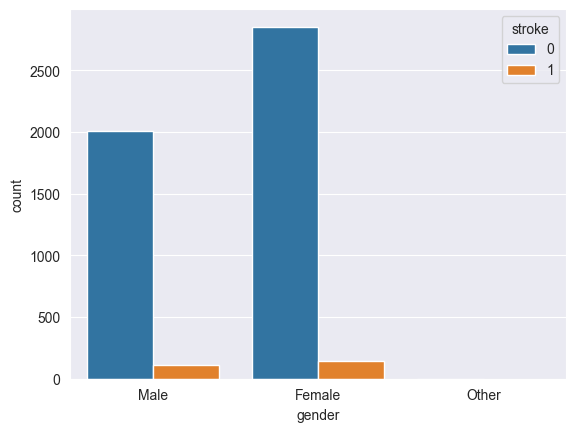

In [26]:
sns.countplot(x=df['gender'],hue=df['stroke'])

<Axes: ylabel='avg_glucose_level'>

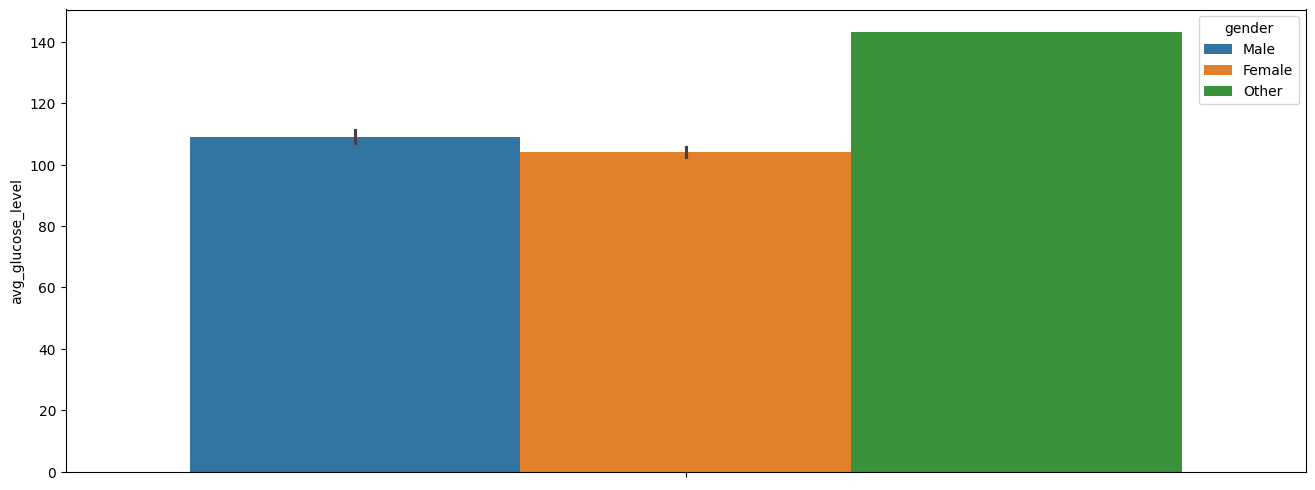

In [54]:
plt.figure(figsize=(16,6))
sns.barplot(y=df['avg_glucose_level'],hue=df['gender'])

In [57]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [62]:
df[df['gender']=='others']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# AutoMate Data Preprocessing

In [149]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer,SimpleImputer

In [80]:
df.drop(columns='id',axis=1,inplace=True)

In [205]:
cate_cols=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
cate_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [206]:
num_cols=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [207]:
gender_sub=df['gender'].unique()
ever_married_sub=df['ever_married'].unique()
work_type_sub=df['work_type'].unique()
residence_sub=df['Residence_type'].unique()
smoking_status_sub=df['smoking_status'].unique()

In [208]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [209]:
gender_sub=['Male', 'Female', 'Other']
ever_married_sub=['Yes', 'No']
work_type_sub=['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
residence_sub=['Urban', 'Rural']
smoking_status_sub=['formerly smoked', 'never smoked', 'smokes', 'Unknown']

In [210]:
# Numerical columns pipeline
num_cols_pipeline = Pipeline(
    steps=[
        ('impute', KNNImputer(n_neighbors=10)),  # Impute missing values
        ('scaler', StandardScaler())  # Standardize features
    ]
)

# Categorical columns pipeline
cate_cols_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
        ('encode', OneHotEncoder(categories=[gender_sub, ever_married_sub, work_type_sub, residence_sub, smoking_status_sub]))
    ]
)


In [211]:
# Preprocessing pipeline combining numerical and categorical transformers
preprocess_obj = ColumnTransformer(
    transformers=[
        ('num_cols', num_cols_pipeline, num_cols),
        ('cate_cols', cate_cols_pipeline, cate_cols)
    ]
)

In [212]:
preprocess_obj

ColumnTransformer(transformers=[('num_cols',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(n_neighbors=10)),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('cate_cols',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(categories=[['Male',
                                                                             'Female',
                                                                             'Other'],
                                                                            ['Yes',
                                                                             'No'],
                                                                            ['Private',
                                                                             'Self-employed',
                                                                             'Govt_job',
                                                                             'children',
                                                                             'Never_worked'],
                                                                            ['Urban',
                                                                             'Rural'],
                                                                            ['formerly '
                                                                             'smoked',
                                                                             'never '
                                                                             'smoked',
                                                                             'smokes',
                                                                             'Unknown']]))]),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

# Modeling

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [220]:
x=df.drop(columns='stroke',axis=1)
y=df['stroke']

In [221]:
def split_data(x,y):
   x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=100)

   return x_train,x_test,y_train,y_test

In [222]:
x_train,x_test,y_train,y_test=split_data(x,y)

In [223]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1123,Male,3.0,0,0,No,children,Urban,100.91,18.0,Unknown
5060,Male,78.0,0,0,Yes,Private,Urban,60.22,29.7,formerly smoked
2824,Female,41.0,0,0,Yes,Private,Rural,97.41,25.5,never smoked
2973,Female,26.0,0,0,No,Private,Urban,81.94,26.0,smokes
2488,Female,2.0,0,0,No,children,Rural,89.72,17.8,Unknown
...,...,...,...,...,...,...,...,...,...,...
4149,Female,81.0,1,1,Yes,Self-employed,Urban,59.11,20.7,formerly smoked
1890,Female,44.0,0,0,Yes,Govt_job,Urban,91.21,24.1,never smoked
350,Female,79.0,1,1,Yes,Self-employed,Urban,200.28,30.0,formerly smoked
79,Male,43.0,0,0,Yes,Self-employed,Urban,143.43,45.9,Unknown


In [224]:
def model_eval(x_train,x_test,y_train,y_test,models):
   report={}
   for i in range(len(models)):
      model=list(models.values())[i]
     
      model.fit(x_train,y_train)
      y_test_pred =model.predict(x_test)
      test_model_score = accuracy_score(y_test,y_test_pred)*100
     
      report[list(models.keys())[i]] =  test_model_score
   return report

In [216]:
models={
                'LogisticRegression':LogisticRegression(),
                'KNeighborsClassifier': KNeighborsClassifier(),
                'DesisionTree':DecisionTreeClassifier(),
					 'SupportVectorMechines':SVC(),
                'Xgboost':XGBClassifier()
            }

In [217]:
x_train,x_test,y_train,y_test=split_data(df)

In [225]:
x_train=preprocess_obj.fit_transform(x_train)
x_test=preprocess_obj.transform(x_test)

In [226]:
model_eval(x_train,x_test,y_train,y_test,models)

{'LogisticRegression': 95.78630549285177,
 'KNeighborsClassifier': 95.63581640331076,
 'DesisionTree': 90.895410082769,
 'SupportVectorMechines': 95.71106094808127,
 'Xgboost': 94.6576373212942}

# smote

In [227]:
from imblearn.over_sampling import SMOTE

In [228]:
df2=df.copy()

<Axes: xlabel='stroke', ylabel='count'>

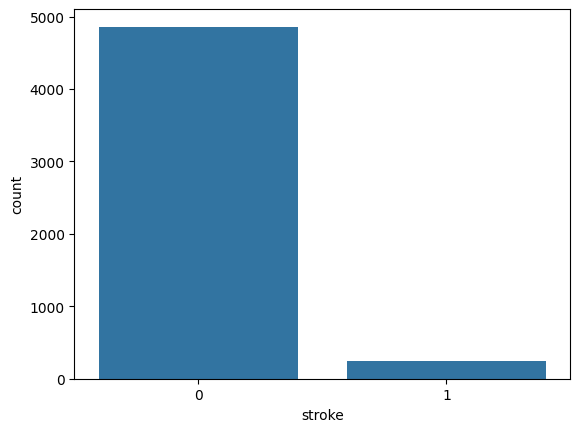

In [240]:
sns.countplot(x=df2['stroke'])

In [243]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,2,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,2,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,3,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,2,1


In [244]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df2.columns:
   if df2[col].dtypes=='object':
      df2[col]=le.fit_transform(df2[col])

In [245]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [253]:
x = df2.drop(columns=['stroke'],axis=1)
y = df2['stroke']

In [257]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [258]:
y_resampled.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [259]:
x_train,x_test,y_train,y_test=split_data(X_resampled,y_resampled)

In [260]:
model_eval(x_train,x_test,y_train,y_test,models)

{'LogisticRegression': 81.28955696202532,
 'KNeighborsClassifier': 89.08227848101265,
 'DesisionTree': 91.06012658227847,
 'SupportVectorMechines': 77.6503164556962,
 'Xgboost': 95.21360759493672}

In [263]:
data=pd.concat([X_resampled,y_resampled])

In [266]:
data.to_csv('E:\MLProjects\health_stock\Datasets\clean_dataset.csv')

In [307]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [309]:
from pymongo import MongoClient
Client=MongoClient(os.getenv('MongoDB'))
db=Client[os.getenv('db')]
collection=db[os.getenv('collection')]
dict_m=data.to_dict(orient='records')
collection.insert_many(dict_m)

InsertManyResult([ObjectId('66fc428900b4980ec5589d0a'), ObjectId('66fc428900b4980ec5589d0b'), ObjectId('66fc428900b4980ec5589d0c'), ObjectId('66fc428900b4980ec5589d0d'), ObjectId('66fc428900b4980ec5589d0e'), ObjectId('66fc428900b4980ec5589d0f'), ObjectId('66fc428900b4980ec5589d10'), ObjectId('66fc428900b4980ec5589d11'), ObjectId('66fc428900b4980ec5589d12'), ObjectId('66fc428900b4980ec5589d13'), ObjectId('66fc428900b4980ec5589d14'), ObjectId('66fc428900b4980ec5589d15'), ObjectId('66fc428900b4980ec5589d16'), ObjectId('66fc428900b4980ec5589d17'), ObjectId('66fc428900b4980ec5589d18'), ObjectId('66fc428900b4980ec5589d19'), ObjectId('66fc428900b4980ec5589d1a'), ObjectId('66fc428900b4980ec5589d1b'), ObjectId('66fc428900b4980ec5589d1c'), ObjectId('66fc428900b4980ec5589d1d'), ObjectId('66fc428900b4980ec5589d1e'), ObjectId('66fc428900b4980ec5589d1f'), ObjectId('66fc428900b4980ec5589d20'), ObjectId('66fc428900b4980ec5589d21'), ObjectId('66fc428900b4980ec5589d22'), ObjectId('66fc428900b4980ec5589d